In [20]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

quandl.ApiConfig.api_key = 'SHyjwb19U-a_JRSq4Kt3'

df = quandl.get("WIKI/AMZN")
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


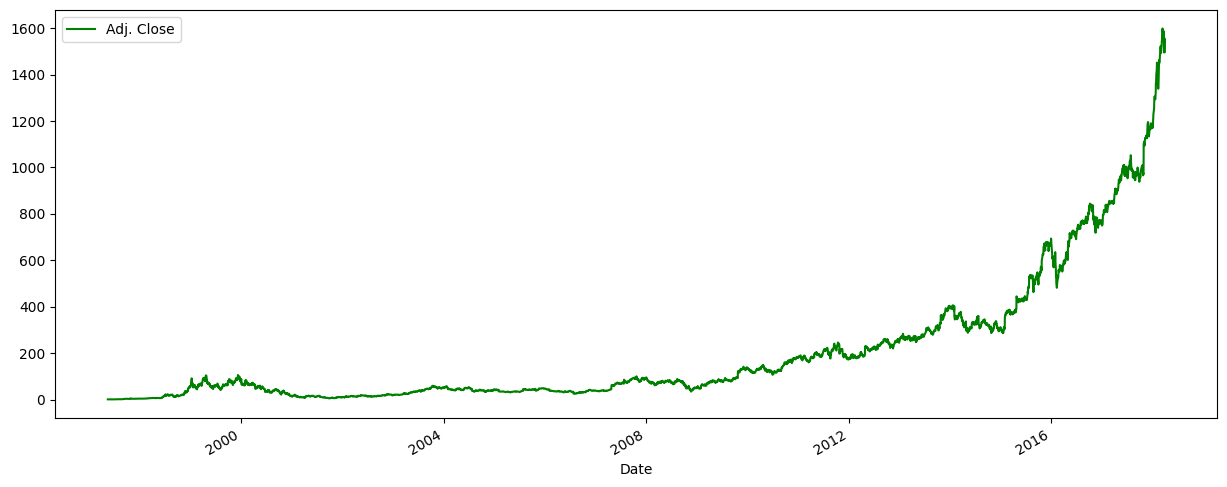

In [21]:
df['Adj. Close'].plot(figsize=(15,6), color='g')
plt.legend(loc='upper left')
plt.show()

In [22]:
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

C:\Users\ianko\AppData\Local\Temp\ipykernel_14860\183587925.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'], 1))


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)
confidence

forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[1503.00600799 1541.92482554 1553.33206516 1539.41118543 1560.35108562
 1575.86961796 1577.82940516 1594.06155567 1617.44053884 1606.8214745
 1607.32207232 1587.08513928 1594.3278311  1619.20860773 1634.15198513
 1641.99113393 1649.29773186 1678.08743187 1698.85691579 1687.98222703
 1690.98581393 1681.74073084 1670.40804833 1641.91657681 1686.20350712
 1681.25078404 1641.03254237 1589.33250395 1653.55813882 1590.91950554]


(17282.0, 18029.5)

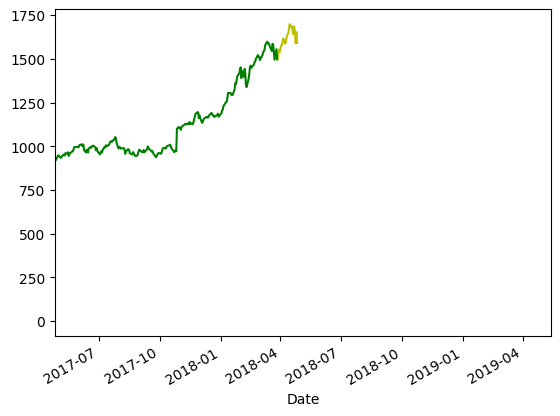

In [24]:
dates = pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot (dates, forecast_predicted, color='y')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,4,26))